In [2]:
require(data.table)
require(dada2)
require(phyloseq)
require(ggplot2)
require(RColorBrewer)
require(vegan)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: dada2

Loading required package: Rcpp

Loading required package: phyloseq

Loading required package: ggplot2

Loading required package: RColorBrewer

Loading required package: vegan

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



In [3]:
meta=fread("~/Documents/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [16]:
#fix rownames
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [17]:
#pull out the lab dilution effect samples
meta_m=meta[meta$Species=="MM"| meta$Species=="MB",]
asv_m=asv_all[rownames(asv_all) %in% meta_m$UniqueID,]
asv_m=asv_m[,colSums(asv_m)>0]
taxa_m=taxa[rownames(taxa)%in% colnames(asv_m),]

In [19]:
taxa_m=as.matrix(taxa_m)
meta_m=as.data.frame(meta_m)
row.names(meta_m)=meta_m$UniqueID

In [20]:
OTU = otu_table(t(asv_m), taxa_are_rows = TRUE)
TAX = tax_table(taxa_m)
SAMP=sample_data(meta_m)

In [21]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

In [22]:
macoma = phyloseq(OTU, TAX, SAMP)

In [23]:
macoma.ord <- ordinate(macoma, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.0647877 
Run 1 stress 0.08194692 
Run 2 stress 0.06478844 
... Procrustes: rmse 0.000929183  max resid 0.001777986 
... Similar to previous best
Run 3 stress 0.08301404 
Run 4 stress 0.06478822 
... Procrustes: rmse 0.0008072948  max resid 0.001554753 
... Similar to previous best
Run 5 stress 0.06478789 
... Procrustes: rmse 0.0005238835  max resid 0.001028195 
... Similar to previous best
Run 6 stress 0.08263887 
Run 7 stress 0.07053277 
Run 8 stress 0.0647877 
... Procrustes: rmse 2.777733e-05  max resid 5.607702e-05 
... Similar to previous best
Run 9 stress 0.0647878 
... Procrustes: rmse 0.0004136583  max resid 0.0008192635 
... Similar to previous best
Run 10 stress 0.08263898 
Run 11 stress 0.07053268 
Run 12 stress 0.2366582 
Run 13 stress 0.08194723 
Run 14 stress 0.07053277 
Run 15 stress 0.08263903 
Run 16 stress 0.06478769 
... New best solution
... Procrustes: rmse 0.0002245877  max resid 0.0005652

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


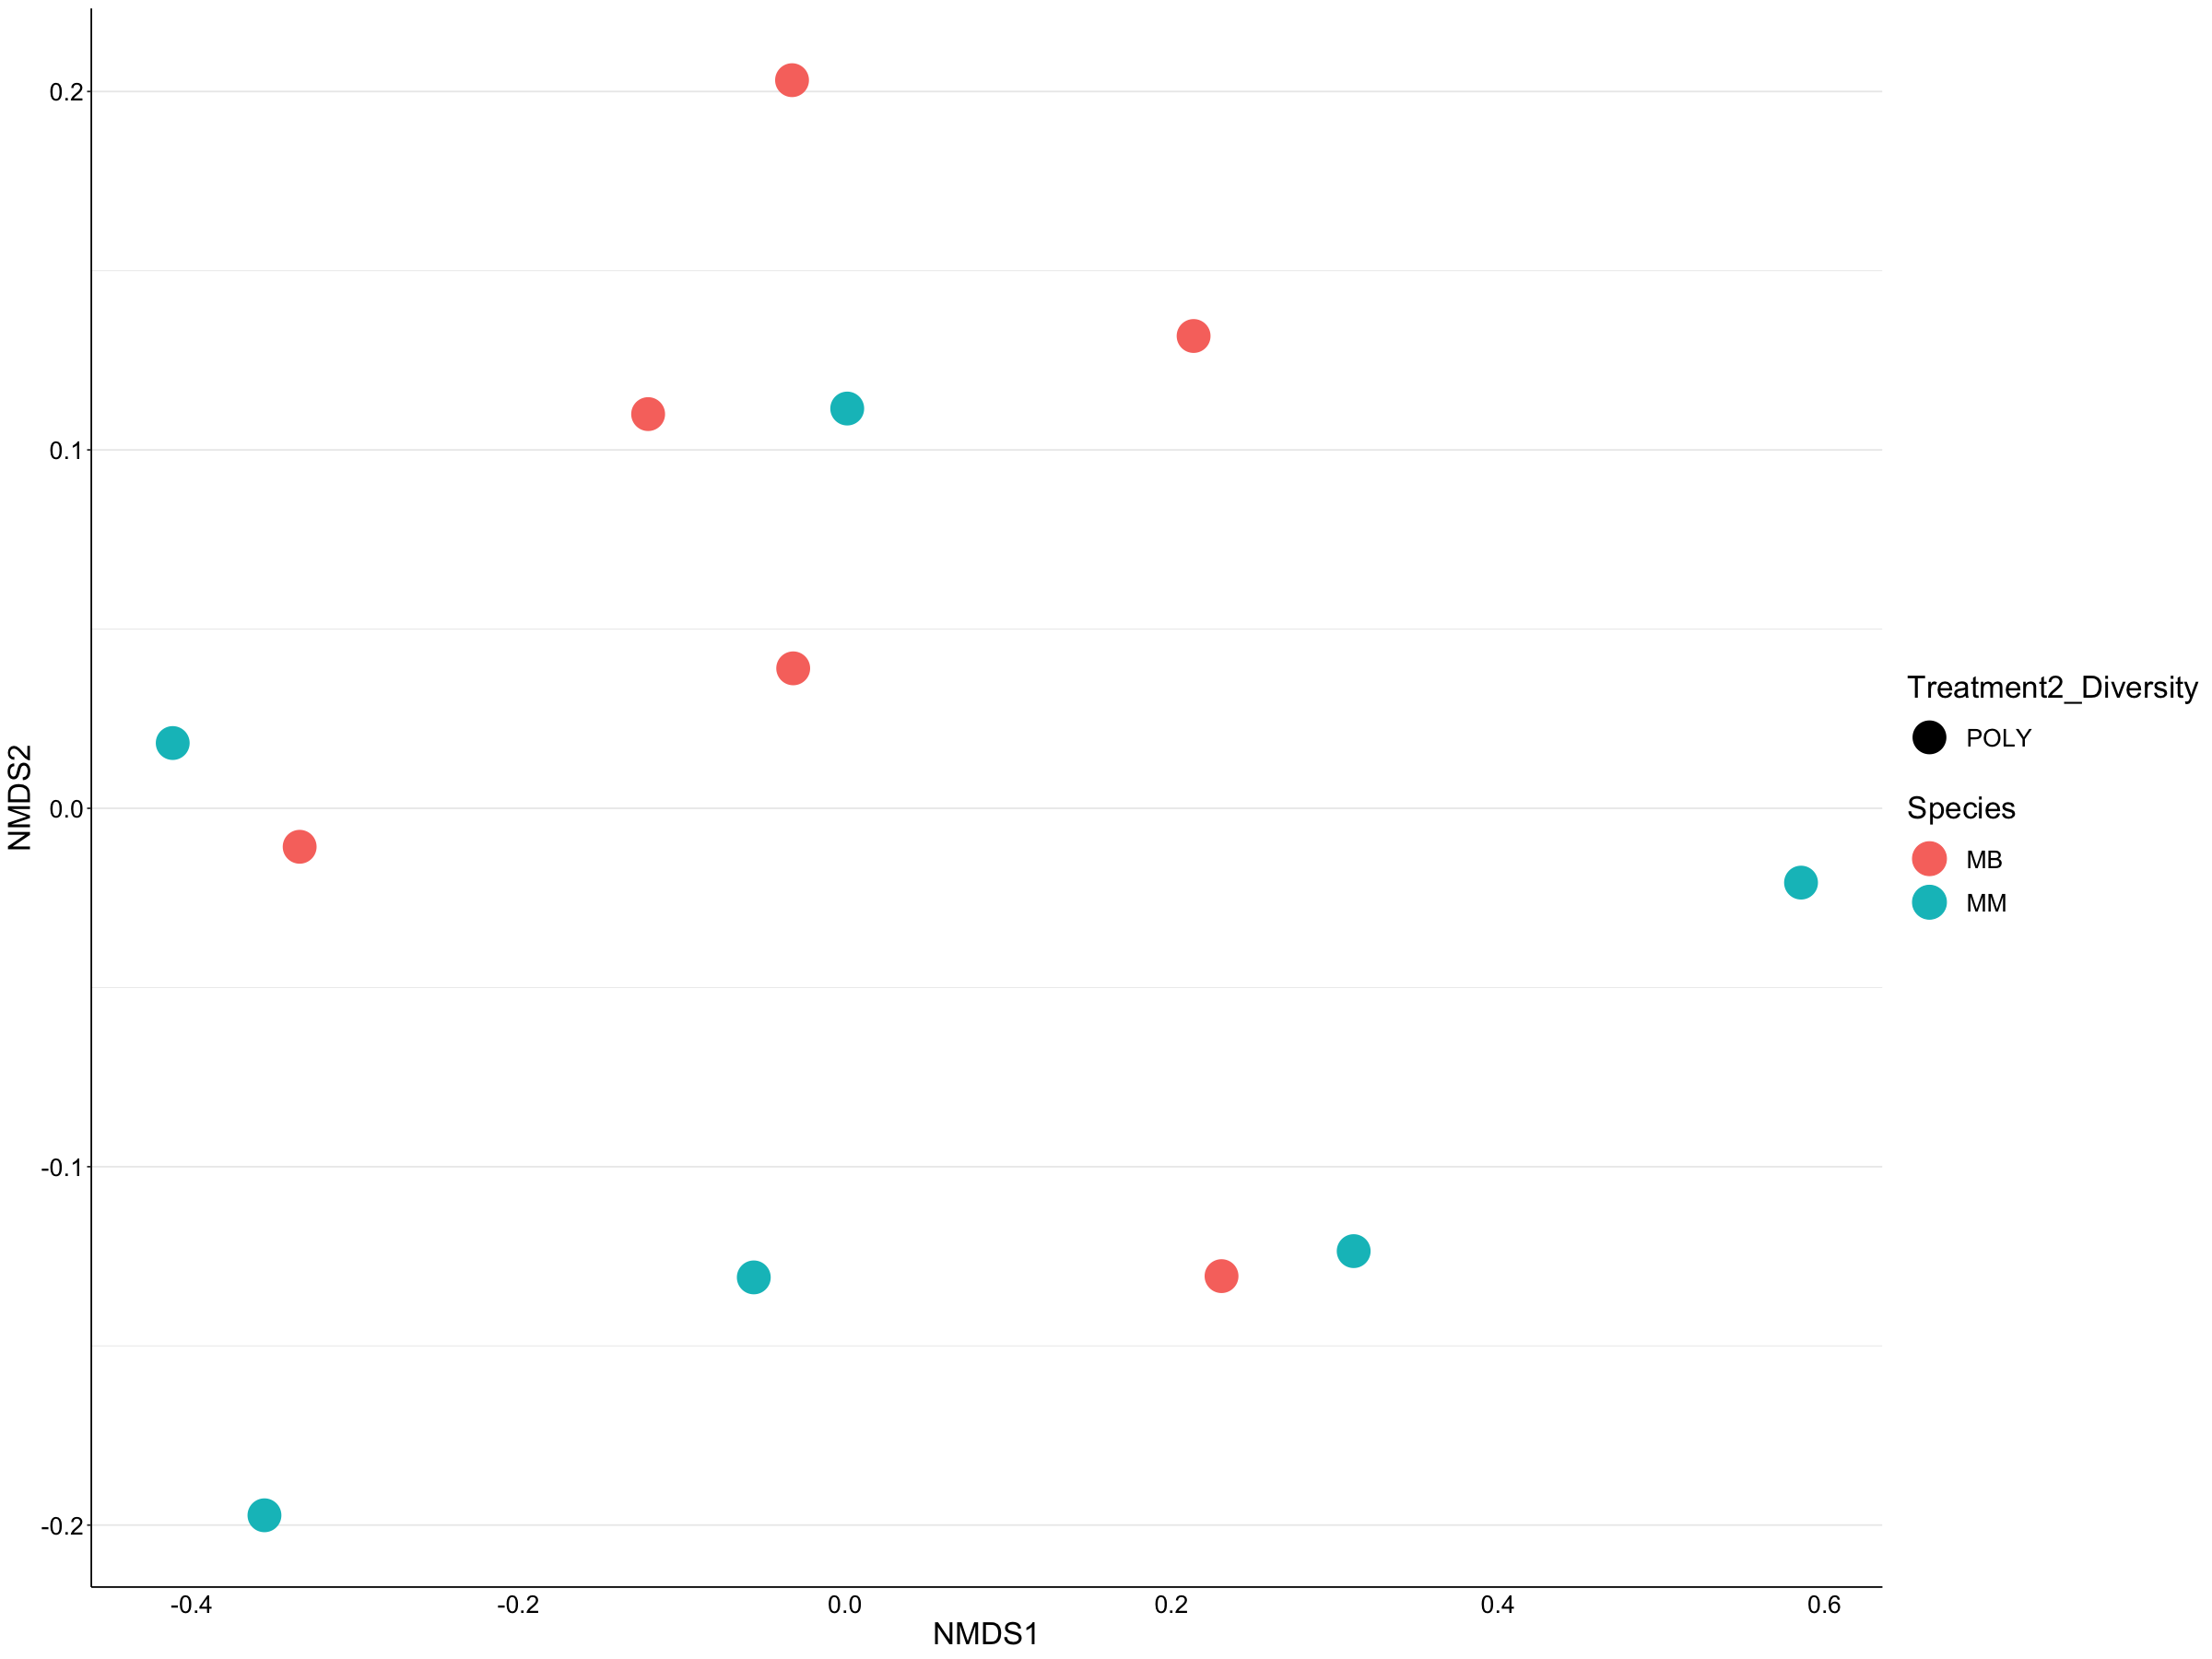

In [25]:
plot_ordination(macoma, macoma.ord, type="samples", color="Species", shape="Treatment2_Diversity")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=10)+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

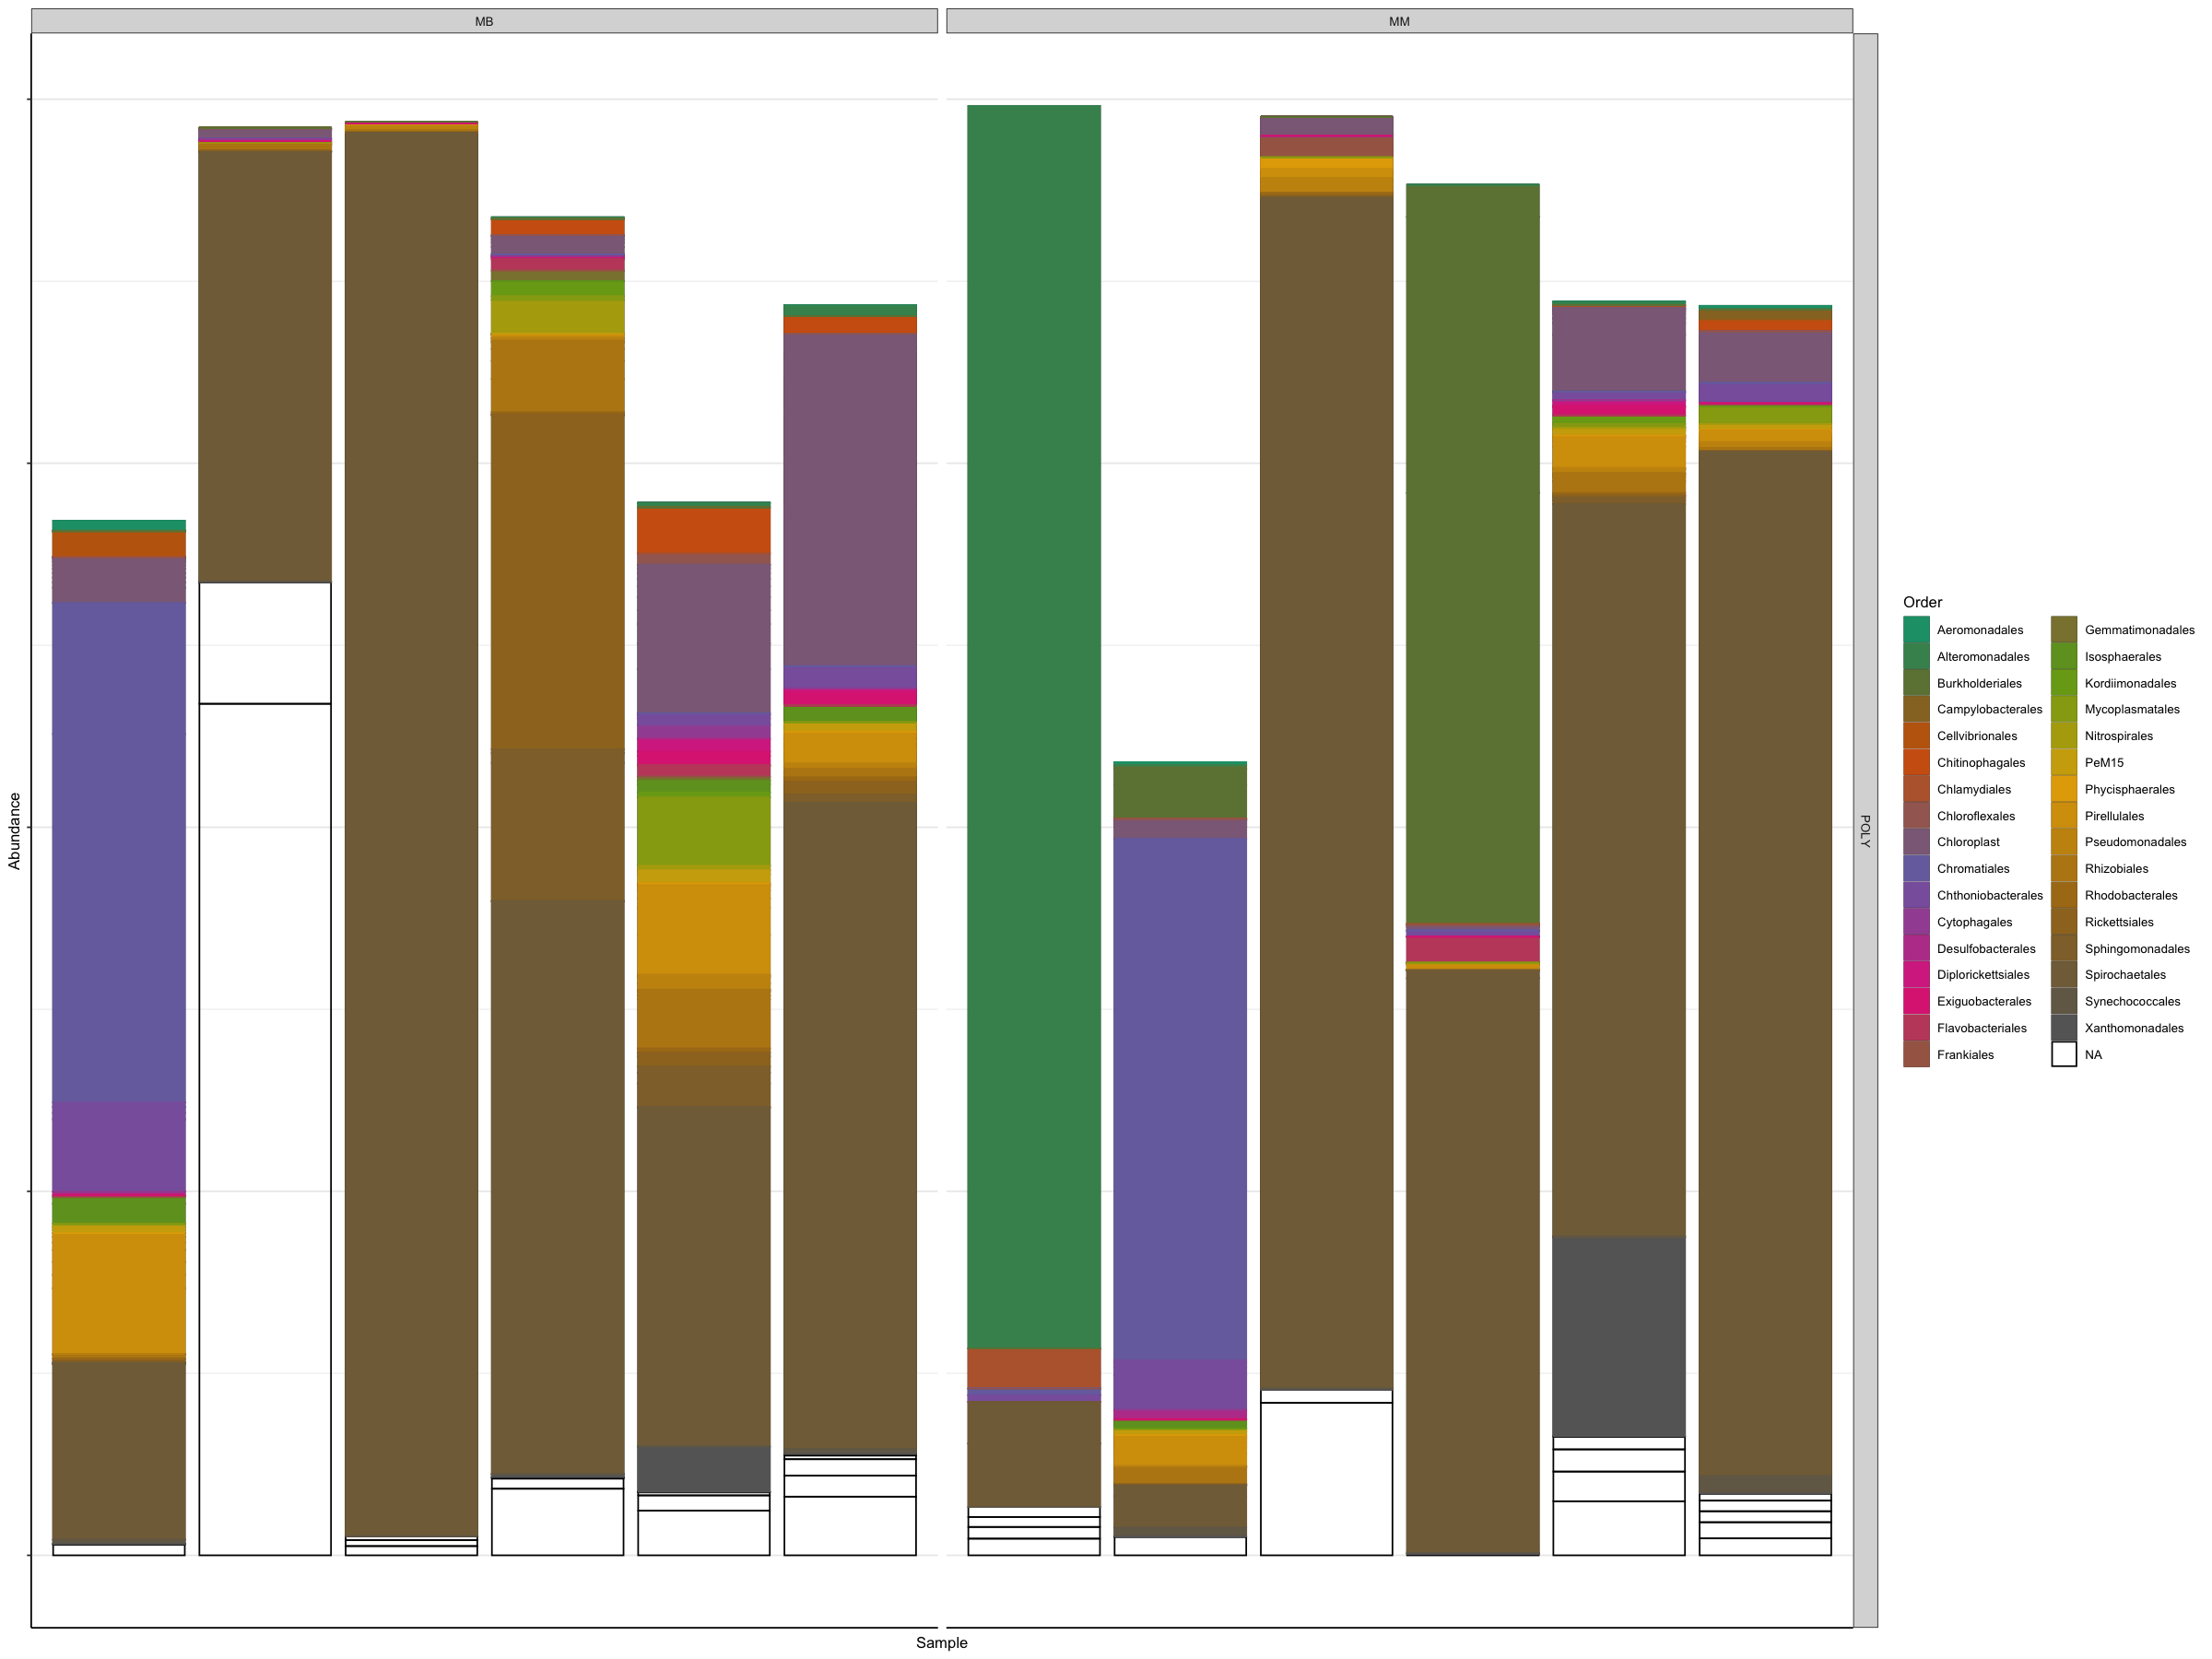

In [33]:
#top 100 taxa
macoma100 = prune_taxa(names(sort(taxa_sums(macoma),TRUE)[1:100]), macoma)

mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(33)

plot_bar(macoma100,  fill="Order") +
facet_grid(Treatment2_Diversity~Species, scales = "free_x")+
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
scale_fill_manual(values=mycolors, drop=TRUE)+
scale_color_manual(values=mycolors, drop=TRUE)+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_blank(),
          text = element_text(size=10))